In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [17]:
df = pd.read_csv(r'/Users/joaopinto/projects/Capstone-LDSA/data/two-years-recid.csv')
df.head()

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_charge_degree,c_charge_desc,juv_fel_count,juv_misd_count,juv_other_count,priors_count,compas_screening_date,type_of_assessment,decile_score,score_text,v_type_of_assessment,v_decile_score,v_score_text,is_recid,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,NaN,F,False Imprisonment,0,0,0,0,2013-01-05,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,NaN,M,Battery,0,0,0,1,2013-04-03,Risk of Recidivism,3,Low,Risk of Violence,3,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,NaN,M,DUI Level 0.15 Or Minor In Veh,0,0,0,8,2014-10-31,Risk of Recidivism,4,Low,Risk of Violence,2,Low,1,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,2014-01-23,F,arrest case no charge,0,1,0,1,2014-01-23,Risk of Recidivism,10,High,Risk of Violence,10,High,1,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,NaN,M,Battery,0,0,0,0,2013-12-09,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


<AxesSubplot:xlabel='race'>

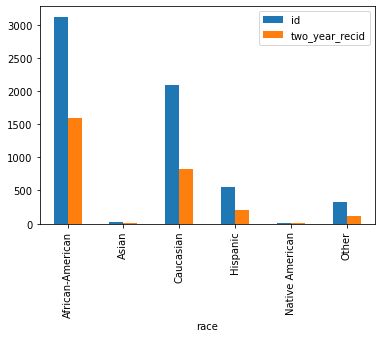

In [31]:
df.groupby('race').agg({'id':'count','two_year_recid':'sum'}).plot(kind='bar')

In [19]:
df.describe()

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,v_decile_score,is_recid,is_violent_recid,two_year_recid
count,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000
mean,3057.500000,34.757442,0.062643,0.090939,0.104351,3.438502,4.488878,3.688584,0.479392,0.113510,0.450114
std,1765.104105,11.802448,0.396906,0.486264,0.448095,4.858464,2.849050,2.503754,0.499616,0.317241,0.497546
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1529.250000,25.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,3057.500000,31.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,4585.750000,42.000000,0.000000,0.000000,0.000000,5.000000,7.000000,5.000000,1.000000,0.000000,1.000000
max,6114.000000,96.000000,10.000000,13.000000,9.000000,38.000000,10.000000,10.000000,1.000000,1.000000,1.000000


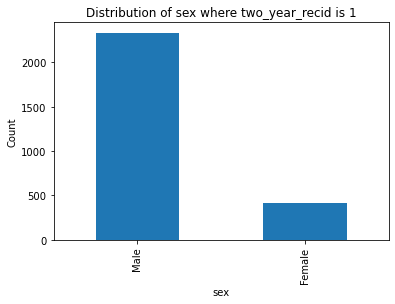

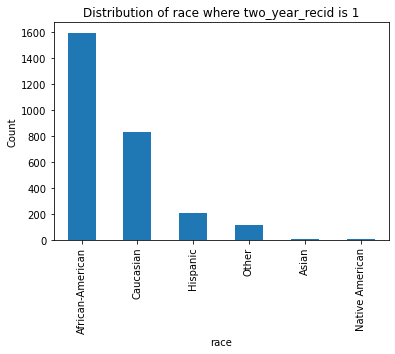

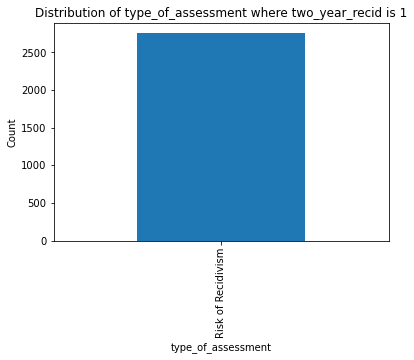

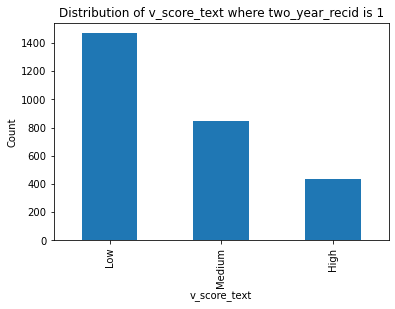

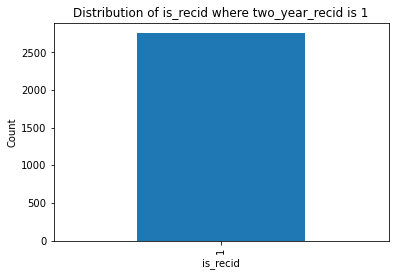

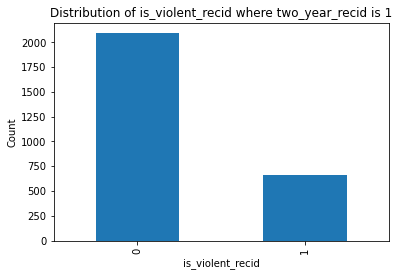

In [20]:
trues = df.loc[df['two_year_recid'] == 1]

categoricals = ['sex','race','type_of_assessment','v_score_text','is_recid','is_violent_recid']

for col in categoricals:
    trues[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col} where two_year_recid is 1")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()